In [15]:
url = '../TensorFlow_Keras_classificando_imagens_com_redes_convolucionais/uvas'
import pathlib

In [ ]:
data_dir = pathlib.Path(url) # Define the path to the dataset
len(list(data_dir.glob('*/*.JPG'))) # Count the number of images in the dataset

1600

In [30]:
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir()] # List the subfolders in the dataset
print(subfolders) # Print the subfolder names

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']


In [18]:
import PIL.Image

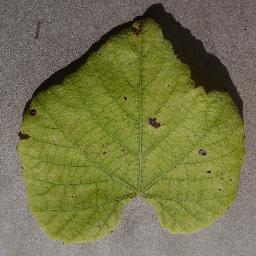

In [ ]:
leafblight = list(data_dir.glob('LeafBlight/*')) # Get the list of images in the LeafBlight subfolder
PIL.Image.open(str(leafblight[0])) # Open the first image in the LeafBlight subfolder

In [20]:
import numpy as np

In [ ]:
for subfolder in subfolders:
    path = data_dir / subfolder # Create the path to each subfolder
    images = list(path.glob('*.JPG')) # Get the list of images in the current subfolder
    print(f"Classe '{subfolder}' tem {len(images)} imagens.") # Print the number of images in each subfolder
    
    if images:
        img = PIL.Image.open(str(images[0])) # Open the first image in the subfolder
        img_array = np.array(img) # Convert the image to a NumPy array
        print(f"Dimensões da primeira imagem em '{subfolder}': {img_array.shape}") # Print the dimensions of the first image in the subfolder

Classe 'BlackMeasles' tem 400 imagens.
Dimensões da primeira imagem em 'BlackMeasles': (256, 256, 3)
Classe 'BlackRot' tem 400 imagens.
Dimensões da primeira imagem em 'BlackRot': (256, 256, 3)
Classe 'HealthyGrapes' tem 400 imagens.
Dimensões da primeira imagem em 'HealthyGrapes': (256, 256, 3)
Classe 'LeafBlight' tem 400 imagens.
Dimensões da primeira imagem em 'LeafBlight': (256, 256, 3)


In [22]:
import tensorflow as tf

In [ ]:
batch_size = 64 
altura = 256
largura = 256

In [ ]:
treino = tf.keras.utils.image_dataset_from_directory( # Load the training dataset
    data_dir,
    validation_split=0.2, # Split the dataset into training and validation sets
    subset='training',
    seed=568, # Set a random seed for reproducibility
    image_size=(altura,largura), 
    batch_size=batch_size
)

Found 1600 files belonging to 4 classes.
Using 1280 files for training.


In [ ]:
validacao = tf.keras.utils.image_dataset_from_directory( # Load the validation dataset
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=568,
    image_size=(altura,largura),
    batch_size=batch_size
)

Found 1600 files belonging to 4 classes.
Using 320 files for validation.


In [ ]:
treino.class_names 

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']

In [ ]:
tf.random.set_seed(424242) # Para reprodutibilidade

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)), # define a forma de entrada da imagem (256x256 pixels, 3 canais de cor)
    tf.keras.layers.Rescaling(1./255), # normaliza os pixels da imagem para o intervalo [0,1]
    tf.keras.layers.Flatten(), # achata a imagem 2D em um vetor 1D
    tf.keras.layers.Dense(128, activation=tf.nn.relu), # camada oculta com 128 neurônios e função de ativação ReLU
    tf.keras.layers.Dense(4, activation=tf.nn.softmax), # camada de saída com 4 neurônios (uma para cada classe) e função de ativação softmax
])

In [ ]:
modelo.compile( # Compila o modelo
    optimizer = tf.keras.optimizers.Adam(), # define o otimizador Adam para otimização do modelo
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
) # Define a função de perda como entropia cruzada esparsa e a métrica de avaliação como acurácia